In [1]:
import os
import random as rn
from os import mkdir
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau
import sys
sys.path.insert(0, "../")

2024-11-05 19:43:45.857406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 19:43:45.977797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 19:43:46.012765: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 19:43:46.236566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-05 19:43:47.645571: W tensorflow/compiler/tf2

In [2]:
seed = 0
os.environ["PYTHONHASHSEED"] = "0"

np.random.seed(seed)
rn.seed(seed)
tf.random.set_seed(seed)

from deeparuco.impl.architectures import custom_decoder
from deeparuco.impl.datagen import custom_decoder_gen


# Control paramters
batch_size = 32
epochs = 100
patience = 20
reduce_after = 10

# Model
model = custom_decoder()
model.summary
model.compile(loss="mae", optimizer="adam")


# Load dataset
train_src_dir = '../dataset/nested2_no_reflection/crops/train'
valid_src_dir = '../dataset/nested2_no_reflection/crops/val'
train_csv     = '../dataset/nested2_no_reflection/crops/train128.csv'
valid_csv     = '../dataset/nested2_no_reflection/crops/val128.csv'
train_df = pd.read_csv(train_csv)
valid_df = pd.read_csv(valid_csv)

train_generator = custom_decoder_gen(train_df, train_src_dir, batch_size, False, True)
valid_generator = custom_decoder_gen(valid_df, valid_src_dir, batch_size, False, True)

# Callbacks

stop = EarlyStopping(
    monitor="val_loss",
    patience=patience,
    verbose=True,
    restore_best_weights=True,
    min_delta=1e-4,
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=reduce_after, factor=0.5)

I0000 00:00:1730857433.795785   43453 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-05 19:43:54.116296: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Loading data...


100%|██████████| 86491/86491 [01:13<00:00, 1173.69it/s]


Loading data...


100%|██████████| 6429/6429 [00:07<00:00, 904.96it/s] 


In [ ]:
num = 3
plt.imshow(valid_generator.crops[num], cmap ="gray")
print(valid_generator.id[num])
print(valid_generator.files[num])
print(valid_generator.rot[num])

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


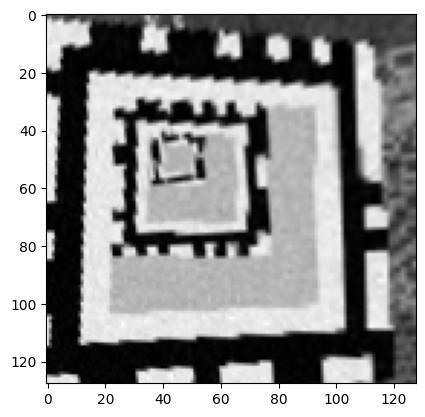

In [3]:
num = 8
marker, bit = valid_generator[num]
plt.imshow(marker[num], cmap="gray")
print(bit[num])

In [4]:
run_name = 'decoder'

if not exists("../models/nested2_decoder"):
    mkdir("../models/nested2_decoder")

    
model_name = "simple_decoder"
csv_logger = CSVLogger(f"../models/nested2_decoder/loss_{run_name}.csv")


model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[stop, reduce_lr, csv_logger],
    verbose=True,
)
model.save(f"../models/nested2_decoder/{run_name}.keras")

/home/su/Infrared_apriltag_detection/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 337s 124ms/step - loss: 0.1820 - val_loss: 0.1122 - learning_rate: 0.0010
Epoch 2/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 328s 121ms/step - loss: 0.1140 - val_loss: 0.1104 - learning_rate: 0.0010
Epoch 3/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 325s 120ms/step - loss: 0.1128 - val_loss: 0.1103 - learning_rate: 0.0010
Epoch 4/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 327s 121ms/step - loss: 0.1121 - val_loss: 0.1102 - learning_rate: 0.0010
Epoch 5/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 326s 121ms/step - loss: 0.1122 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 6/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 326s 120ms/step - loss: 0.1116 - val_loss: 0.1096 - learning_rate: 0.0010
Epoch 7/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 325s 120ms/step - loss: 0.1116 - val_loss: 0.1114 - learning_rate: 0.0010
Epoch 8/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 323s 120ms/step - loss: 0.1110 - val_loss: 0.1098 - learning_rate: 0.0010
Epoch 9/100
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 325s 120ms/step - los